<a href="https://colab.research.google.com/github/wahyunirosyidah/Klasifikasi-Jenis-Jenis-Noken-Menggunakan-CNN/blob/main/Scratch_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from io import BytesIO
from ipywidgets import widgets

In [15]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/SKRIPSI AYU'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SKRIPSI AYU


In [16]:
# Directory Path
BASE_DIR = 'Dataset Binary'
print(f"Base Directory: {os.listdir(BASE_DIR)}")

data_train=f'{BASE_DIR}/train'
print(f"Train Directory: {sorted(os.listdir(data_train))}")
data_validation=f'{BASE_DIR}/valid'
print(f"Valid Directory: {sorted(os.listdir(data_validation))}")

Base Directory: ['train', 'valid']
Train Directory: ['Bitu Agia', 'Junum Ese']
Valid Directory: ['Bitu Agia', 'Junum Ese']


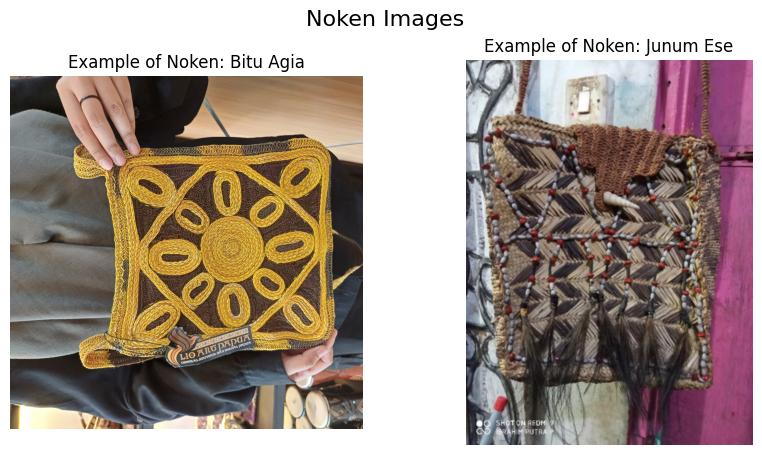

In [17]:
# Plot noken Images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Noken Images', fontsize=16)

# List of noken
noken_list = os.listdir(data_train)
# Plot images for each noken
for i, noken in enumerate(noken_list):
    dir_path = f'{data_train}/{noken}'
    img = tf.keras.preprocessing.image.load_img(dir_path + '/' + os.listdir(dir_path)[0])
    # row, col = divmod(i, 3)
    axes[i].imshow(img)
    axes[i].set_title(f'Example of Noken: {noken}')
    axes[i].axis('off')

# Disable axis on empty subplots if any
for jj in range(len(noken_list), 9):
    row, col = divmod(jj, 3)
    axes[i].axis('off')

plt.show()

In [18]:
BATCH_SIZE=32
IMAGE_SIZE=300
LABEL_MODE='binary'

# # Inisiasi Dataset
# train_dataset,validation_dataset=tf.keras.utils.image_dataset_from_directory(
#     data_train,
#     image_size=(IMAGE_SIZE,IMAGE_SIZE),
#     batch_size=BATCH_SIZE,
#     label_mode=LABEL_MODE,
#     validation_split=0.2, #20% data untuk validasi
#     subset='both',
#     seed=42
# )

# Prepare the training set
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_train,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='binary'
    )

# Prepare the validation set
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_validation,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE
    )

Found 400 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [19]:
#Optimasi
SHUFFLE_BUFFER_SIZE=500
PREFETCH_BUFFER_SIZE=tf.data.AUTOTUNE

train_dataset_final=(
    train_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

validation_dataset_final=(
    validation_dataset
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

In [20]:
FILL_MODE='reflect'

data_augmentation=tf.keras.Sequential([
    tf.keras.Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE)
])

In [21]:
#create model
def create_model():
    model=tf.keras.models.Sequential([
        data_augmentation,
        tf.keras.layers.Rescaling(1./255),

        tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    return model

In [22]:
model = create_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,257 (1.69 MB)

 Trainable params: 444,001 (1.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [23]:
# Constant for epochs
EPOCHS = 50

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

# Train the model
history = model.fit(
    train_dataset_final,
    epochs=EPOCHS,
    validation_data=validation_dataset_final,
    verbose=1
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 150s 7s/step - accuracy: 0.7038 - loss: 0.5818 - val_accuracy: 0.5000 - val_loss: 0.6739
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.8910 - loss: 0.3137 - val_accuracy: 0.5000 - val_loss: 0.6347
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8895 - loss: 0.2690 - val_accuracy: 0.5600 - val_loss: 0.6093
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9241 - loss: 0.2049 - val_accuracy: 0.5000 - val_loss: 0.6130
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9406 - loss: 0.1670 - val_accuracy: 0.5000 - val_loss: 0.6070
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.9164 - loss: 0.2303 - val_accuracy: 0.5100 - val_loss: 0.5925
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9165 - loss: 0.1941 - val_accuracy: 0.7700 - val_loss: 0.5559
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.9356 - loss: 0.1575 - val_accuracy: 0.7700 - val_loss

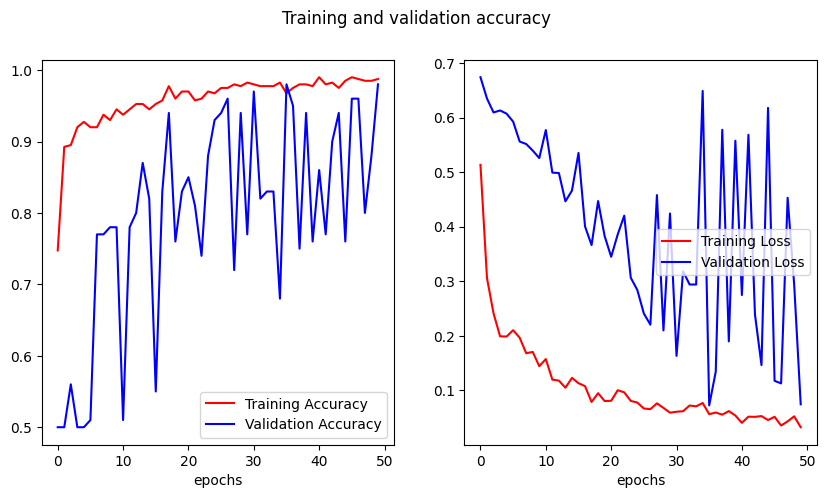

In [24]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


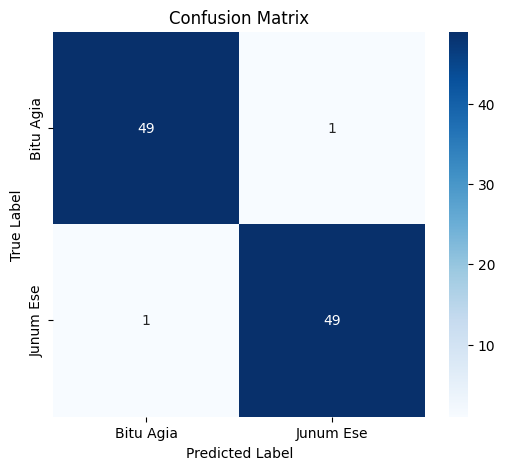

Classification Report:
              precision    recall  f1-score   support

   Bitu Agia       0.98      0.98      0.98        50
   Junum Ese       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate Model
y_true = []
y_pred = []
class_names = validation_dataset.class_names

for images, labels in validation_dataset_final:
    preds = model.predict(images)
    y_true.extend(labels.numpy().astype(int))
    y_pred.extend((preds > 0.5).astype(int).flatten())

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
